In [7]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.use("pgf")
mpl.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})
%matplotlib inline

# Many Species Population Dynamics

### _a)_
The trivial FP is $$ \vec{n_0} = \vec{0}$$, and from the lecture we know that for the Voltero-Lotkasystem there is a second FP at $$\vec{n_1} = \vec{1}$$. 
In order to calculate the third vector, we use the fact that the prey population is limited even when there are no predators, so we consider $(n_3)_i = 0$ for $i\in [3,6]$ (the components of the predators). 
So we get a 3-d function system:
$$  \frac{dN_i}{dt} = N_i \left( a_i - N_i\right) = 0$$
once again give we get root the trivial FP, and along with it we also get a third FP
$$ \vec{n_2} = (11, 12,10, 0,0,0) $$

### _b)_

In [2]:
B = np.array([[2,3,5],[1,3,7],[4,3,2]])
C = np.array([[2,3,3],[3,3,3],[7,8,2]])
a = np.array([11,12,10])
d = np.array([8,9,17])


#defining Jacaobian of the system
def dfN_N(u, a, b, i):
    f = a[i] - 2*u[i] 
    for j in range(0,3):
        f = f-b[i,j]*u[3+j]
    g= np.zeros(3)
    g[i] = f
    return g
def dfN_P(u,a,b,i):
    f = np.array([0,0,0])
    for j in range(0,3):
        f[j] = u[i+3]*b[i,j]
    return f
def dfP_N(u,c,d,i):
    f = np.array([0,0,0])
    for j in range(0,3):
        f[j] = u[i+3]*c[i,j]
    return f 
def dfP_P(u,c,d, i):
    f = 0 
    for j in range(0,3):
        f = f + c[i,j]*u[j] 
    f = f - d[i]
    g = np.zeros(3)
    g[i] = f
    return g

def Df(u,a,b,c,d):
    A = np.concatenate((dfN_N(u,a,b,0), dfN_P(u,a,b,0),
                  dfN_N(u,a,b,1), dfN_P(u,a,b,1),
                  dfN_N(u,a,b,2), dfN_P(u,a,b,2),
                  dfP_N(u,c,d,0), dfP_P(u,c,d,0),
                  dfP_N(u,c,d,1), dfP_P(u,c,d,1),
                  dfP_N(u,c,d,2), dfP_P(u,c,d,2)), axis = None)
    A = A.reshape(6,6)
    return A


In [3]:
# computing Jacobian for non-trivial FP n_1 = u1
u1 = np.ones(6)
Df_u = Df(u1,a,B,C,d)
print(Df_u)

[[-1.  0.  0.  2.  3.  5.]
 [ 0. -1.  0.  1.  3.  7.]
 [ 0.  0. -1.  4.  3.  2.]
 [ 2.  3.  3.  0.  0.  0.]
 [ 3.  3.  3.  0.  0.  0.]
 [ 7.  8.  2.  0.  0.  0.]]


In [24]:
# calculating eigenvalues
ew,ev = LA.eig(Df_u)
print("Eigenvalues:")
print(ew)
print()
print("Eigenvectors:")
print(ev)
print()
print(ev[0,1])

Eigenvalues:
[-12.02159877  11.02159877  -3.4503485    2.4503485   -1.04608191
   0.04608191]

Eigenvectors:
[[-0.40160401  0.38314985  0.04478062 -0.03866944 -0.63878689 -0.05979483]
 [-0.48799832  0.46557424 -0.36032966  0.31115569  0.6018527   0.05633753]
 [-0.28378089  0.27074084  0.72189047 -0.62337451 -0.09883683 -0.0092518 ]
 [ 0.25941189  0.26994676 -0.34032611 -0.41381679 -0.22127696  0.47019617]
 [ 0.29281876  0.30471031 -0.35330469 -0.42959798  0.38937014 -0.82738098]
 [ 0.60580765  0.63040986  0.32616763  0.3966009  -0.139224    0.29584006]]

0.38314984916496536


In [16]:
#we identify EVC as ev
EVC_inv = LA.inv(ev)
print(EVC_inv)
v_0 = np.ones(6)*0.1
print()

#computing coefficients for the linear combination of v
c = EVC_inv@v_0
print("coefficients : ", c)

[[-0.47213759 -0.54061637 -0.24055935  0.20356102  0.31276538  0.55118469]
 [ 0.45371206  0.51951842  0.23117134  0.21336541  0.32782952  0.57773215]
 [-0.29059439 -0.18784488  0.73427021 -0.62835601 -0.22243922  0.37658389]
 [ 0.23898706  0.15448507 -0.60386947 -0.72765922 -0.25759275  0.43609791]
 [-0.9878184   0.60243722  0.36198167 -0.07143523  0.06710615 -0.00184677]
 [-0.4648729   0.28351034  0.17035061  0.76314111 -0.71689358  0.01972906]]

coefficients :  [-0.01858022  0.23233289 -0.02183804 -0.07595514 -0.00295754  0.00549646]


initial value v_0 = [0.1 0.1 0.1 0.1 0.1 0.1]


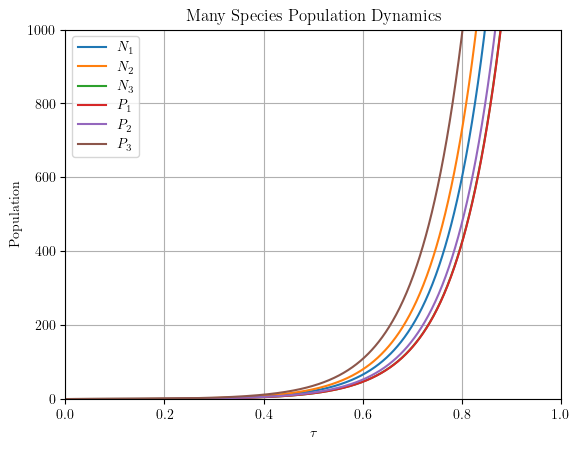

In [53]:
def v(t,i):
    v = 0
    for j in range(0,6):
        v = v + c[j]*np.exp(ew[j]*t)*ev[i,j]
    return v

#Checking the functions works by computing v(t = 0)
v_0 = np.array([])
for i in range(0,6):
    v_0 = np.append(v_0,v(0,i))
print( "initial value v_0 = {}".format(v_0))

t = np.linspace(0,20,20000)
for i in range(0,3):
    plt.plot(t,v(t,i), label = r"$N_{}$".format(i+1))
for i in range(0,3):
    plt.plot(t,v(t,i+3), label = r"$P_{}$".format(i+1))
plt.legend()
plt.xlabel(r"$\tau$")
plt.xlim(0,1)
plt.ylim(-0.1,1000)
plt.ylabel(r" Population")
plt.title("Many Species Population Dynamics")
plt.grid()

We can see that the Fixpoint $n_1$ is not stable, since it contains one eigenvalue, which is bigger than 0 - $\lambda_2 = 0.23233289$. This behavior can be seen on the upper plot, since the six populations grow asymptotically $N_i / P_i \to \infty $for $t \to \infty$ 